In [74]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

plt.style.use("ggplot")

In [9]:
DATA_DIRECTORY = "./data/results/"

In [29]:
resultados = pd.read_csv(DATA_DIRECTORY + "results")
eventos = pd.read_csv(DATA_DIRECTORY + "eventos")
acciones =  pd.read_csv(DATA_DIRECTORY + "actions")

In [40]:
resultados_duel = pd.read_csv(DATA_DIRECTORY + "results_duel.csv")
eventos_duel = pd.read_csv(DATA_DIRECTORY + "eventos_duel.csv")
acciones_duel =  pd.read_csv(DATA_DIRECTORY + "actions_duel.csv")

In [58]:
acciones_duel.pivot_table(
    index = "dealer_hand", 
    columns = "player_hand", 
    values = "action", 
    aggfunc = np.mean
).fillna(0)

/var/folders/nz/20sgdrzs7j19b2hfzhxyfrfw0000gn/T/ipykernel_8118/338693592.py:1: FutureWarning: The provided callable <function mean at 0x11745eaf0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  acciones_duel.pivot_table(


player_hand,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21
dealer_hand,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000,2.625000,2.000000,2.600000,2.400000,1.0,1.0,1.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.888889,1.000000,0.846154,0.800000,1.0,1.0,1.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.714286,1.000000,0.857143,1.0,1.0,1.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.888889,0.833333,1.000000,0.818182,0.777778,1.0,1.0,1.0,1.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,1.000000,1.000000,0.750000,0.875000,1.000000,1.0,1.0,1.0,1.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,1.000000,0.000000,1.0,1.0,1.0,1.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,1.600000,2.000000,0.785714,1.0,1.0,1.0,1.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2.000000,1.777778,1.714286,0.000000,0.909091,1.0,1.0,1.0,1.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.888889,0.000000,0.000000,2.625000,0.888889,1.0,1.0,1.0,1.0


In [107]:
plt.figure()
sns.heatmap(acciones.pivot_table(
    index = "dealer_hand", 
    columns = "player_hand", 
    values = "action", 
    aggfunc = np.mode
).fillna(0)#.round()
, annot=True, linewidth=.5, cmap="crest", cbar = False)
plt.title("Selección Mediana del Agente por situación - Vanilla")
plt.xlabel("Mano del Jugador")
plt.ylabel("Carta del Dealer")


AttributeError: module 'numpy' has no attribute 'mode'

<Figure size 640x480 with 0 Axes>

In [45]:
# ¿CVuantas veces pide con menos de 11?

pivot_acciones = acciones_duel.pivot_table(index="player_hand", columns="action", 
                     aggfunc = "count").fillna(0)


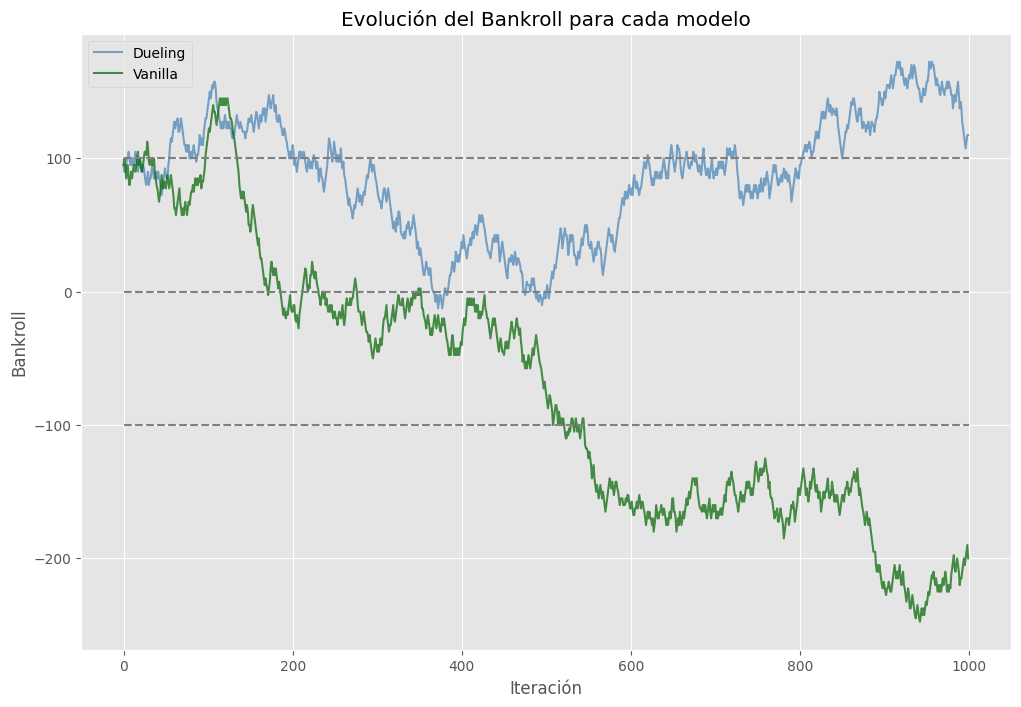

In [105]:
plt.figure(figsize = (12,8))
plt.plot(eventos_duel.bankroll,color = "steelblue", alpha  = 0.7, label = "Dueling")
plt.plot(eventos.bankroll, color = "darkgreen", alpha  = 0.7, label = "Vanilla")
plt.hlines(xmin = 0, xmax = 1000,y=100, color='gray', linestyle='--')
plt.hlines(xmin = 0, xmax = 1000,y=0, color='gray', linestyle='--')
plt.hlines(xmin = 0, xmax = 1000,y=-100, color='gray', linestyle='--')
plt.title("Evolución del Bankroll para cada modelo")
plt.xlabel("Iteración")
plt.ylabel("Bankroll")
plt.legend()

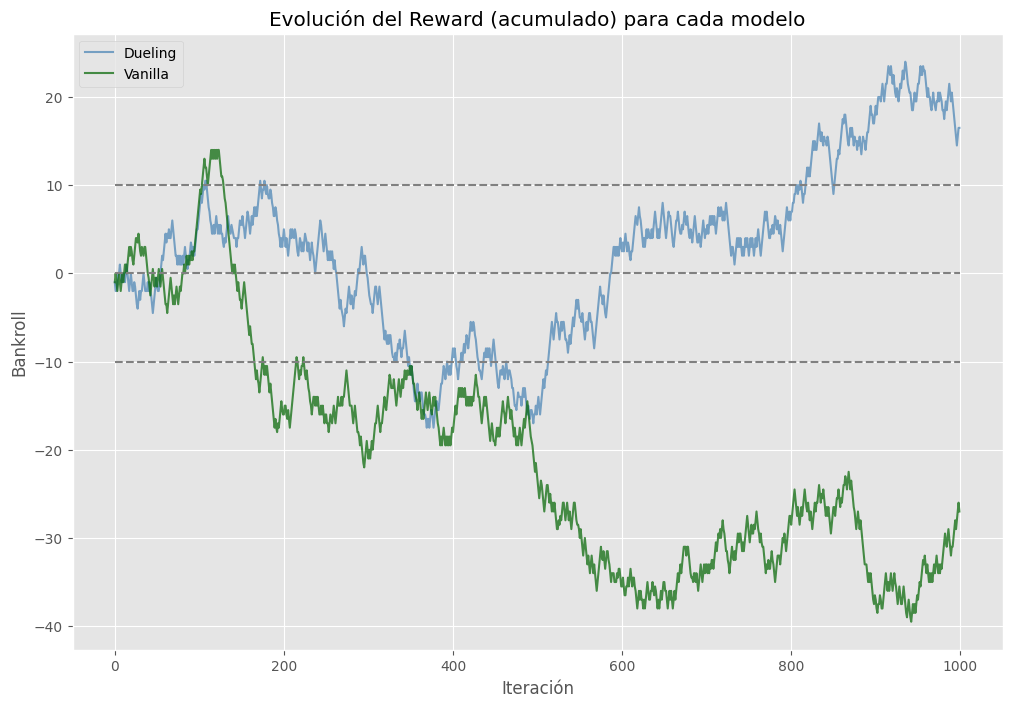

In [106]:
plt.figure(figsize = (12,8))
plt.plot(eventos_duel.reward.cumsum(),color = "steelblue", alpha  = 0.7, label = "Dueling")
plt.plot(eventos.reward.cumsum(), color = "darkgreen", alpha  = 0.7, label = "Vanilla")
plt.hlines(xmin = 0, xmax = 1000,y=10, color='gray', linestyle='--')
plt.hlines(xmin = 0, xmax = 1000,y=0, color='gray', linestyle='--')
plt.hlines(xmin = 0, xmax = 1000,y=-10, color='gray', linestyle='--')
plt.title("Evolución del Reward (acumulado) para cada modelo")
plt.xlabel("Iteración")
plt.ylabel("Bankroll")
plt.legend()

In [79]:
eventos_duel.bankroll

0       95.0
1       90.0
2       90.0
3       95.0
4      100.0
       ...  
995    112.5
996    107.5
997    112.5
998    117.5
999    117.5
Name: bankroll, Length: 1000, dtype: float64

In [41]:
resultados_duel.loc[0,:]/1000

win          0.429
loss         0.350
draw         0.096
surrender    0.125
Name: 0, dtype: float64

In [104]:
import altair as alt
print(alt.__version__)


5.5.0
